Object Tracking
Satya Mallick, LearnOpenCV.com

What is tracking?
Tracking in computer vison.
Motion model and appearnace model.
OpenCV API Tracker Class.
Goal
Given the initial location of an object, track location in subsequent frames



In [1]:
#Import Modules
#import urllib.request

import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlopen, urlretrieve

from IPython.display import clear_output, Image, display,HTML, YouTubeVideo
from matplotlib.animation import FuncAnimation
from base64 import b64encode

%matplotlib inline


In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [4]:
URL = r"https://www.dropbox.com/s/ld535c8e0vueq6x/opencv_bootcamp_assets_NB11.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB11.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

#motion model and appearance model
#motion model sees the velocity/position/dynamics of the object and predicts the position of the object in the next frame
#appearance model sees the appearance of the object and predicts the position of the object in the next frame
#motion model approximates the position and appearance model finetunes the position

ALGORITHMs
Tracker Class in OpenCV
BOOSTING
MIL
KCF
CRST
TLD
Tends to recover from occulusions
MEDIANFLOW
Good for predictable slow motion
GOTURN
Deep Learning based
Most Accurate
MOSSE
Fastest

In [5]:
#need to define the initial boundaries for the object detection
HTML( """
    <video width="1024" controls>
    <source src="race_car.mp4" type="video/mp4">
    </video>
    """)

In [6]:
video_input = "race_car.mp4"

def drawRectangle(frame,bbox):
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(frame, p1, p2, (0,0,255), 2, 1)
    
def displayRectangle(frame,bbox):
    plt.figure(figsize=(20,10))
    frameCopy = frame.copy()
    drawRectangle(frameCopy,bbox)
    frameCopy = cv2.cvtColor(frameCopy, cv2.COLOR_RGB2BGR)
    plt.imshow(frameCopy);plt.axis('off')
    
    
def drawText(frame,text,location,color=(50,170,50)):
    cv2.putText(frame, text, location, cv2.FONT_HERSHEY_SIMPLEX, 1.2, color, 2)
    

In [7]:
if not os.path.isfile('goturn.prototxt') or not os.path.isfile('goturn.caffemodel'):
    print("Downloading GOTURN model zip file...")
    urlretrieve("https://www.dropbox.com/sh/77frbrkmf9ojfm6/AACgY7-wSfj-LIyYcOgUSZ0Ua?dl=0", "GOTURN.zip")
    
    #uncompress the zip file
    !tar -xvf GOTURN.zip
    
    #Delete the zip file
    os.remove("GOTURN.zip")
    
    #https://github.com/spmallick/goturn-files

In [50]:
#Set up the tracker
tracker_types = ['BOOSTING', 'MIL','KCF', 'TLD', 'MEDIANFLOW', 'GOTURN','MOSSE', 'CSRT']

#change the tracker type here
tracker_type = tracker_types[7]

if tracker_type == 'BOOSTING':
    tracker = cv2.legacy.TrackerBoosting.create()
elif tracker_type == 'MIL':
    tracker = cv2.legacy.TrackerMIL.create()
elif tracker_type == 'KCF':
    tracker = cv2.legacy.TrackerKCF.create()
elif tracker_type == 'GOTURN':
    tracker = cv2.TrackerGOTURN.create()
elif tracker_type == 'TLD':
    tracker = cv2.legacy.TrackerTLD.create()
elif tracker_type == 'CSRT':
    tracker = cv2.legacy.TrackerCSRT.create()
elif tracker_type == 'MEDIANFLOW':
    tracker = cv2.legacy.TrackerMedianFlow.create()
else:
    tracker = cv2.legacy.TrackerMOSSE.create()

READ VIDEO AND SET UP OUTPUT VIDEO

In [51]:
#Read video
video = cv2.VideoCapture(video_input)
ok, frame = video.read()

#Exit if video not opened
if not video.isOpened():
    print("Could not open video")
    sys.exit()
else:
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    heigth = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

video_output = 'race_car_'+tracker_type+'.mp4'
video_out = cv2.VideoWriter(video_output,cv2.VideoWriter_fourcc(*"XVID"), 10, (width,heigth))

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


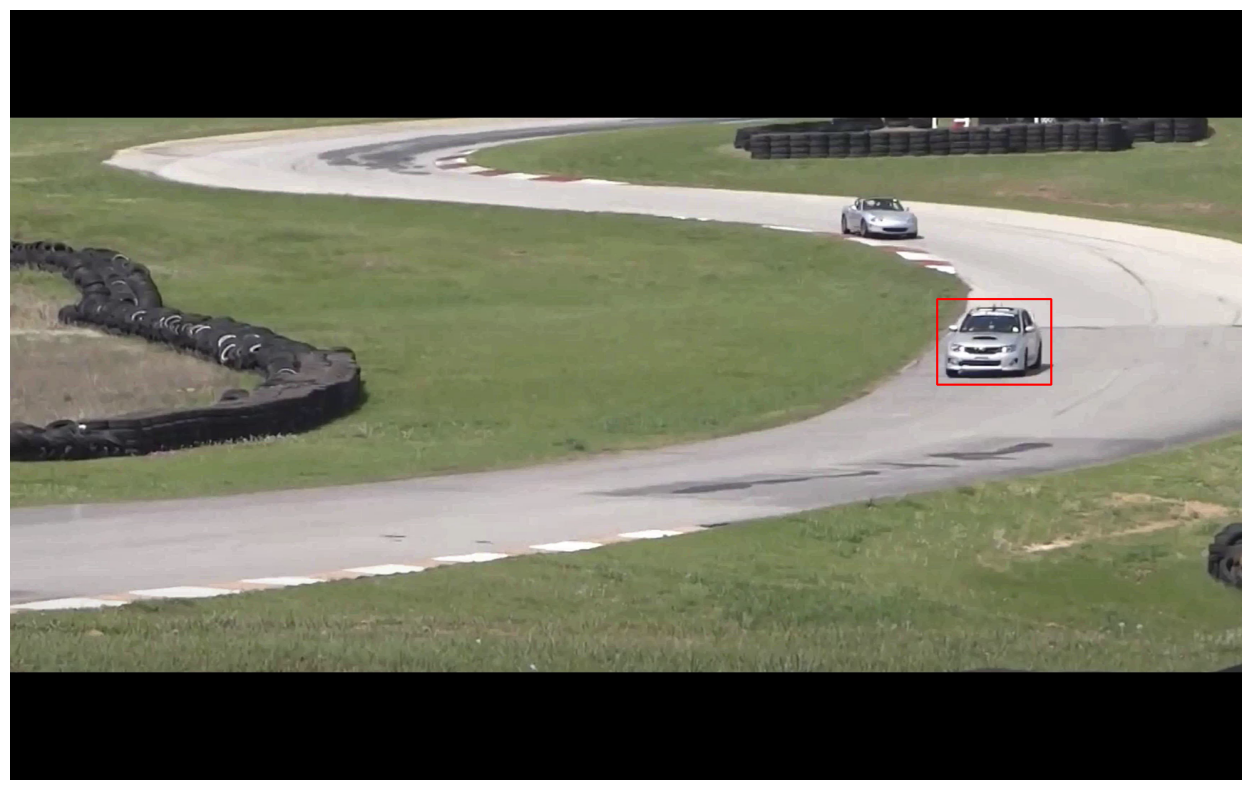

In [52]:
#Define an initial bounding box
bbox = (1300,405,160,120)
displayRectangle(frame,bbox)

Intilialize Tracker
One frame
A bounding box


In [53]:
#initialize tracker with first frame and bounding box
ok = tracker.init(frame,bbox)

In [54]:
#Read frame and track object 
while True:
    ok, frame = video.read()
    if not ok:
        break

    #start timer
    timer = cv2.getTickCount() 
    #getTickCount() returns the number of clock-cycles after a reference event (like the moment machine was switched ON) to the moment this function is called.
    
    #Update tracker
    ok, bbox = tracker.update(frame)
    
    
    #Calculate FPS
    fps = cv2.getTickFrequency()/ (cv2.getTickCount() - timer)

    
    #Draw bounding box
    if ok:
        drawRectangle(frame,bbox)
    else:
        drawText(frame,"Tracking failure detected", (80,140),(0,0,255))
        
    #Display Info
    drawText(frame,tracker_type + " Tracker", (80,60))
    drawText(frame,"FPS : " + str(int(fps)), (80,100))
    
    #Write frame to output video
    video_out.write(frame)
    
video.release()
video_out.release()

THIS ENCODING AND FORMAT STUFF IS MESSY AND I DON'T UNDERSTAND IT. LOADING VIDEO IN JUPYTER REQUIRES ALL THIS BUT THE PLAIN MP4 FILE WORKS FINE FROM THE TERMINAL

In [13]:
# # Installing ffmpeg
# !apt-get -qq install ffmpeg 

# Change video encoding of mp4 file from XVID to h264 
!ffmpeg -y -i {video_output} -c:v libx264 $"race_car_track_x264.mp4"  -hide_banner -loglevel error

#Why is this needed? Because the video is not encoded in a format that Colab understands. So we need to convert it to a format that Colab understands.

In [14]:
mp4 = open("race_car_track_x264.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""<video width=1024 controls><source src="{data_url}" type="video/mp4"></video>""")